In [1]:
#@title imports

import os
import kagglehub
import json
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [2]:
#@title Download from Kaggle
path = "/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1"
if not os.path.exists(path):
  path = kagglehub.dataset_download("himanshuwagh/spotify-million")

100%|██████████| 5.20G/5.20G [01:29<00:00, 62.4MB/s]

Extracting files...


# Esplorazione dataset

In [3]:
# README
with open(os.path.join(path, "README.md"), "r") as f:
    print(f.read())

# The Million Playlist Dataset
(Documentation updated Aug 5, 2020)

The Million Playlist Dataset contains 1,000,000 playlists created by
users on the Spotify platform.  It can be used by researchers interested
in exploring how to improve the music listening experience.

## What's in the Million Playlist Dataset (MPD)
The MPD contains a million user-generated playlists. These playlists
were created during the period of January 2010 through October 2017.
Each playlist in the MPD contains a playlist title, the track list
(including track metadata) editing information (last edit time, 
number of playlist edits) and other miscellaneous information 
about the playlist. See the **Detailed
Description** section for more details.

## License
Usage of the Million Playlist Dataset is subject to these 
[license terms](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge/challenge_rules)

## Citing the Million Playlist Dataset
To use this dataset, please cite the following 

In [4]:
path, type(path), os.listdir(path)

('/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1',
 str,
 ['README.md', 'stats.txt', 'src', 'data', 'license.txt', 'md5sums'])

In [5]:
type(os.listdir(os.path.join(path, "data")))

list

In [6]:
# data contiene 1000 slice di 1000 playlist ciascuno
mille_playlist = os.listdir(os.path.join(path, "data"))[0] # prendo il file di una una slice
type(mille_playlist), mille_playlist

(str, 'mpd.slice.940000-940999.json')

In [7]:
a_slice = os.path.join(path, "data", mille_playlist)
type(a_slice), a_slice


(str,
 '/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1/data/mpd.slice.940000-940999.json')

In [8]:
with open(a_slice, "r") as f:
    a_slice_file = json.load(f)

type(a_slice_file), len(a_slice_file)

(dict, 2)

In [9]:
a_slice_file.keys()

dict_keys(['info', 'playlists'])

In [10]:
a_slice_file['info'], type(a_slice_file['info'])

({'generated_on': '2017-12-04 03:05:11.774401',
  'slice': '940000-940999',
  'version': 'v1'},
 dict)

In [11]:
type(a_slice_file['playlists']), len(a_slice_file['playlists'])

(list, 1000)

In [12]:
print(type(a_slice_file['playlists'][0]))
print('--------------------------------')
print(len(a_slice_file['playlists'][0]))
print('--------------------------------')
print(a_slice_file['playlists'][0])
print('--------------------------------')
print(a_slice_file['playlists'][0].keys())
print('--------------------------------')
print(type(a_slice_file['playlists'][0]['tracks']))
print('--------------------------------')
print(type(a_slice_file['playlists'][0]['tracks'][0]))
print('--------------------------------')
print(a_slice_file['playlists'][0]['tracks'][0]) # una canzone della prima playlist della prima slice

<class 'dict'>
--------------------------------
11
--------------------------------
{'name': 'high school musical', 'collaborative': 'false', 'pid': 940000, 'modified_at': 1453161600, 'num_tracks': 31, 'num_albums': 4, 'num_followers': 1, 'tracks': [{'pos': 0, 'artist_name': 'High School Musical Cast', 'track_uri': 'spotify:track:4WQJPsbGOdqe24mUVHa8xb', 'artist_uri': 'spotify:artist:2gUMs9PE8XZVQyzCDqaYmW', 'track_name': 'Now Or Never', 'album_uri': 'spotify:album:6j8k5gIeWzXapGKTVaZzER', 'duration_ms': 270733, 'album_name': 'High School Musical 3: Senior Year'}, {'pos': 1, 'artist_name': 'High School Musical Cast', 'track_uri': 'spotify:track:5EBd8sbeMSyIotWaMnR7s4', 'artist_uri': 'spotify:artist:2gUMs9PE8XZVQyzCDqaYmW', 'track_name': 'Right Here, Right Now', 'album_uri': 'spotify:album:6j8k5gIeWzXapGKTVaZzER', 'duration_ms': 235733, 'album_name': 'High School Musical 3: Senior Year'}, {'pos': 2, 'artist_name': 'High School Musical Cast', 'track_uri': 'spotify:track:5sTC1imYc0QzNe3i5

In [13]:
for key,value in a_slice_file['playlists'][0].items():
    print(f'{key} : {type(value)}')

name : <class 'str'>
collaborative : <class 'str'>
pid : <class 'int'>
modified_at : <class 'int'>
num_tracks : <class 'int'>
num_albums : <class 'int'>
num_followers : <class 'int'>
tracks : <class 'list'>
num_edits : <class 'int'>
duration_ms : <class 'int'>
num_artists : <class 'int'>


In [14]:
for key,value in a_slice_file['playlists'][0]['tracks'][1].items():
    print(f'{key} : {type(value)}')

pos : <class 'int'>
artist_name : <class 'str'>
track_uri : <class 'str'>
artist_uri : <class 'str'>
track_name : <class 'str'>
album_uri : <class 'str'>
duration_ms : <class 'int'>
album_name : <class 'str'>


Quindi abbiamo un dataset con tanti file. In particolare, il file 'data' è una lista di file .json. Ciascuno di questo file contiene informazioni riguardo 1000 playlist (quindi abbiamo 1000 file .json). Ciascuno di questi files .json contiene un dizionario a due chiavi: info e playlists. il valore della chiave 'info' è a sua volta un dizionario con informazioni riguardo le 1000 playlist. Il valore della chiave 'playlist' è una lista di lunghezza 1000. Ciascun elemento della lista è una delle mille playlist. Ciascun elemento della lista (ciascuna playlist) è un dizionario che ha come chiavi diverse informazioni inerenti la playlist. Nello specifico le chiavi di ciascuno di questi dizionari sono:
- name : <class 'str'>
- collaborative : <class 'str'>
- pid : <class 'int'>
- modified_at : <class 'int'>
- num_tracks : <class 'int'>
- num_albums : <class 'int'>
- num_followers : <class 'int'>
- tracks : <class 'list'>
- num_edits : <class 'int'>
- duration_ms : <class 'int'>
- num_artists : <class 'int'>

In particolare il valore della chiave 'tracks' è una lista. Questa lista è una lista di dizionari. La lunghezza della lista è pari al numero di tracce nella playlist, e ciascun elemento della lista è un dizionario. Questo dizionario ha le seguenti chiavi (riferite quindi alla singola canzone):

- pos : <class 'int'> indica la posizione della canzone nella playlist
- artist_name : <class 'str'>
- track_uri : <class 'str'>
- artist_uri : <class 'str'>
- track_name : <class 'str'>
- album_uri : <class 'str'>
- duration_ms : <class 'int'>
- album_name : <class 'str'>


## playlist di lunghezza minima e massima


In [15]:
"""
a_slice = None
mille_playlist = None
a_slice_file = None

max_length = 0
min_length = 0

for i in range(1000):
  mille_playlist = os.listdir(os.path.join(path, "data"))[i] # prendo il file di una una slice
  a_slice = os.path.join(path, "data", mille_playlist) # path di una slice
  with open(a_slice, "r") as f:
    a_slice_file = json.load(f)
    for i in range(1000):
      if len(a_slice_file['playlists'][i]['tracks']) > max_length:
        max_length = len(a_slice_file['playlists'][i]['tracks'])
      if len(a_slice_file['playlists'][i]['tracks']) < min_length:
        min_length = len(a_slice_file['playlists'][i]['tracks'])

"""

'\na_slice = None\nmille_playlist = None\na_slice_file = None\n\nmax_length = 0\nmin_length = 0\n\nfor i in range(1000):\n  mille_playlist = os.listdir(os.path.join(path, "data"))[i] # prendo il file di una una slice\n  a_slice = os.path.join(path, "data", mille_playlist) # path di una slice\n  with open(a_slice, "r") as f:\n    a_slice_file = json.load(f)\n    for i in range(1000):\n      if len(a_slice_file[\'playlists\'][i][\'tracks\']) > max_length:\n        max_length = len(a_slice_file[\'playlists\'][i][\'tracks\'])\n      if len(a_slice_file[\'playlists\'][i][\'tracks\']) < min_length:\n        min_length = len(a_slice_file[\'playlists\'][i][\'tracks\'])\n    \n'

In [16]:
# max_length, min_length
pass

# Languange model

Pensiamo adesso alla generazione di playlists (continuazione in realtà) come un language model basato sul single character. Cioè ogni playlist è una parola, ogni canzone è un carattere. Il testo è l'insieme di tutte le nostre playlist.

La differenza con il progetto di Karpathy è che lui dato in input un file di testo contenete per ogni riga una parola (che nel nostro caso è una playlist) genera parole simili (quindi genererebbe playlist simili da zero). Quello che noi dovremmo modificare è che noi vogliamo che la nuova playlist generata sia come la playlist che abbiamo da continuare con uno/due caratteri in più. Vedere le metriche di valutazione date da Silvestri

In [17]:
#@title params per i dati scelti

num_playlist = 1000        # playlist per slice che prendiamo
num_slices = 2

In [18]:
# vogliamo ora leggere tutte le playlist (del sottoinsieme scelto)

playlists = list()

for i in range(num_slices):
  mille_playlist = os.listdir(os.path.join(path, "data"))[i] # prendo il file di una una slice
  a_slice = os.path.join(path, "data", mille_playlist) # path di una slice
  with open(a_slice, "r") as f:
    a_slice_file = json.load(f)
    for j in range(num_playlist):
      playlists.append(a_slice_file['playlists'][j])

In [19]:
len(playlists), len(playlists[6]['tracks']), playlists[6]

(2000,
 132,
 {'name': 'Timeless',
  'collaborative': 'false',
  'pid': 940006,
  'modified_at': 1469577600,
  'num_tracks': 132,
  'num_albums': 118,
  'num_followers': 3,
  'tracks': [{'pos': 0,
    'artist_name': 'Talk Talk',
    'track_uri': 'spotify:track:4jhsuQCUCJKA5f0bXb6XdJ',
    'artist_uri': 'spotify:artist:7Fo8TAyGJr4VmhE68QamMf',
    'track_name': "It's My Life - 1997 Remastered Version",
    'album_uri': 'spotify:album:152Hw6E0tNz3EQNq9c1CDf',
    'duration_ms': 232400,
    'album_name': "It's My Life"},
   {'pos': 1,
    'artist_name': 'Faith No More',
    'track_uri': 'spotify:track:4ReyTz0y3TGkX48wO3Llot',
    'artist_uri': 'spotify:artist:6GbCJZrI318Ybm8mY36Of5',
    'track_name': 'Epic',
    'album_uri': 'spotify:album:6LEP3L94jnkqjOxYJWPRP0',
    'duration_ms': 293653,
    'album_name': 'The Real Thing'},
   {'pos': 2,
    'artist_name': 'ZZ Top',
    'track_uri': 'spotify:track:3zPJpXmoM4yrkBI6EcuSbB',
    'artist_uri': 'spotify:artist:2AM4ilv6UzW0uMRuqKtDgN',
    

In [20]:
playlists_chosen_features = [list() for _ in range(len(playlists))]

# per ora prendiamo solo track_name come informazione sulla playlist
for i in range(len(playlists)):
  for j in range(len(playlists[i]['tracks'])):
    playlists_chosen_features[i].append(playlists[i]['tracks'][j]['track_name'])

len(playlists_chosen_features), playlists_chosen_features[0], type(playlists_chosen_features[0])

(2000,
 ['Now Or Never',
  'Right Here, Right Now',
  'I Want It All',
  'Can I Have This Dance',
  'A Night To Remember',
  'Just Wanna Be With You',
  'The Boys Are Back',
  'Walk Away',
  'Scream',
  'Senior Year Spring Musical',
  "We're All In This Together (Graduation Mix)",
  'High School Musical',
  'What Time Is It',
  'Fabulous',
  'Work This Out',
  'You Are The Music In Me - From "High School Musical 2"/Soundtrack Version',
  "I Don't Dance",
  'You Are The Music In Me',
  'Gotta Go My Own Way',
  'Bet On It',
  'Everyday',
  'All For One',
  "Humuhumunukunukuapua'a",
  'Start Of Something New',
  "Get'Cha Head In The Game",
  "What I've Been Looking For",
  "What I'Ve Been Looking For - Reprise",
  'Stick To The Status Quo',
  'When There Was Me And You',
  'Bop To The Top',
  "We're All In This Together"],
 list)

In [21]:
playlists = playlists_chosen_features

In [22]:
# facciamo un vocabolario che mappa ogni carattere del LM (quindi ogni canzone tra quelle selezionate) to/from interi

chars = list(set(playlists[i][j] for i in range(len(playlists)) for j in range(len(playlists[i])))) # canzoni uniche
print(chars), print(len(chars))
# capire se da qui sopra levare track_name (se vogliamo avere più informazioni sulla canzone)
stoi = {s:i+1 for i,s in enumerate(chars)} # mappa stringa a intero
stoi['.'] = 0                              # stop/start token
itos = {i:s for s,i in stoi.items()}       # mappa intero a stringa
print(itos), print(itos[0])
pass

['La Chispa Adecuada (Bendecida 3)', "I'm Glad", 'Your Unfailing Love - Psalm 143:8-10 (feat. Taylre Nelson)', 'How To Love (feat. Sofia Reyes)', 'Processed Beats', 'Trouble - Live From Bonaroo', 'Dance Forever', 'Young & Relentless', 'The One On The Right Is On The Left', "Can't Delete You", 'West End Girls - 2001 Remastered Version', "Chose Me (feat. Derez De'shon)", 'Who Needs You', 'Every Rose Has Its Thorn', 'Nocturnal Rainbows', 'Safe and Sound', 'Suites for Cello, Suite No. 2 in D minor BWV 1008: Prelude', 'Scales', 'La Ronera', 'Pobre Bohemio', 'Founding Fathers Rap', 'The Mad Tea Party / The Unbirthday Song / Twinkle Twinkle / Clean Cup Move Down / Mad Watch', 'Guerra', 'Being For The Benefit Of Mr. Kite! - Remastered', 'With A Girl Like You', 'Along the Lakeside', 'The Little Things (feat. Angela McCluskey)', "The Writing On My Father's Hand (Remastered)", 'Josefin', 'Another Body for the Fire', 'In This Twilight - fennesz', 'I Am Set Free', 'Piano Concerto No. 21 in D Minor,

In [23]:
print(type(itos[0]))

<class 'str'>


In [24]:
#@title parametri dataset

block_size = 20 # context length : how many songs do we take to predict the next one song?

In [25]:
def build_dataset(playlists):
  X, Y = [], []

  for playlist in playlists:
    context = [0] * block_size
    for song_name in playlist + ['.']:
      index = stoi[song_name]
      X.append(context)
      Y.append(index)
      context = context[1:] + [index] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [26]:
# train, valid/dev, test

random.seed(42)
random.shuffle(playlists)
n1 = int(0.8*len(playlists))
n2 = int(0.9*len(playlists))

Xtr, Ytr = build_dataset(playlists[:n1])
Xdev, Ydev = build_dataset(playlists[n1:n2])
Xte, Yte = build_dataset(playlists[n2:])

Xtr # shape: (somma delle lunghezze di tutte le playlist in playlists +  block_size, context_size)

torch.Size([107506, 20]) torch.Size([107506])
torch.Size([13035, 20]) torch.Size([13035])
torch.Size([14585, 20]) torch.Size([14585])


tensor([[    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0, 24747],
        [    0,     0,     0,  ...,     0, 24747, 21429],
        ...,
        [    0,     0,     0,  ..., 42573, 37598, 12308],
        [    0,     0,     0,  ..., 37598, 12308,  9140],
        [    0,     0,     0,  ..., 12308,  9140,  4746]])

In [27]:
Ytr #labels

tensor([24747, 21429, 37117,  ...,  9140,  4746,     0])

## model

We have tutte le possibili canzoni e le embeddiamo in uno spazio più basso dimensionale.

In [28]:
# parametri modello

g = torch.Generator().manual_seed(2147483647)
embedded_dims = 50
num_neurons = 300   # hidden layer

In [29]:
C = torch.randn((len(itos), embedded_dims), generator=g)
W1 = torch.randn((block_size * embedded_dims, num_neurons), generator=g)
b1 = torch.randn(num_neurons, generator=g)
W2 = torch.randn((num_neurons, len(itos)), generator=g)
b2 = torch.randn(len(itos), generator=g)

In [30]:
params = [C, W1, b1, W2, b2]
sum(p.nelement() for p in params) # number of parameters in total

17622150

In [31]:
C, C.shape

(tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  4.5846e-01,
           5.4011e-02, -1.7400e+00],
         [ 1.1560e-01,  8.0319e-01,  5.4108e-01,  ..., -2.9771e-01,
          -1.3707e+00,  1.1500e-01],
         [-1.0188e+00, -8.3777e-01, -2.1057e+00,  ..., -4.5585e-01,
          -1.3132e-03, -5.1161e-01],
         ...,
         [-4.0766e-02, -3.0540e-01,  7.5620e-01,  ..., -9.4027e-01,
          -3.6736e-01, -9.3964e-01],
         [-5.7536e-01,  1.2160e+00,  2.3642e-01,  ...,  1.0162e+00,
           1.1742e+00, -6.9832e-01],
         [-1.0707e+00,  9.3543e-02, -8.4147e-01,  ...,  1.0640e-01,
          -3.5410e-01, -6.9890e-02]]),
 torch.Size([49350, 50]))

In [32]:
for p in params:
  p.requires_grad = True

In [33]:
lossi = []
log_lossi = []

In [36]:
#@title training

for i in range(100):

  # better to have an approx gradient and perform more steps
  minibatch_portion = 32

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (minibatch_portion,))

  # forward pass
  emb = C[Xtr[ix]] # per ogni elemento di X ci dà l'embedding causale iniziale lungo embedded_dims
  h = torch.tanh(emb.view(-1, block_size * embedded_dims) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in params:
    p.data += -lr * p.grad

  # track stats
  lossi.append(loss.item())
  log_lossi.append(loss.log10().item())
  print(loss.item())

63.35136413574219
71.53742980957031
62.484893798828125
71.84461212158203
70.78881072998047
62.83641052246094
69.11205291748047
70.2357406616211
73.60645294189453
70.68590545654297
66.66316223144531
72.19697570800781
63.24891662597656
70.24110412597656
66.43304443359375
64.47282409667969
71.26494598388672
71.19608306884766
67.09243774414062
67.75674438476562
62.90964126586914
65.88958740234375
72.81497192382812
67.8290786743164
70.41753387451172
68.8848648071289
69.53097534179688
61.910133361816406
62.81193161010742
66.06735229492188
71.44816589355469
65.14260864257812
67.16088104248047
67.32719421386719
72.7078628540039
65.21465301513672
61.2488899230957
64.33452606201172
72.72935485839844
60.52045440673828
63.001129150390625
67.34900665283203
64.3023681640625
64.86371612548828
65.63349151611328
67.37571716308594
62.7844123840332
64.8127670288086
63.941429138183594
66.07633209228516
70.47738647460938
65.66960144042969
67.35755157470703
67.62519073486328
64.8316421508789
65.987922668457

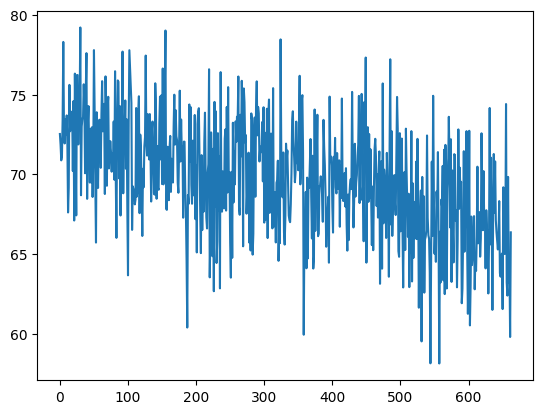

In [37]:
plt.plot(torch.arange(len(lossi)), lossi)

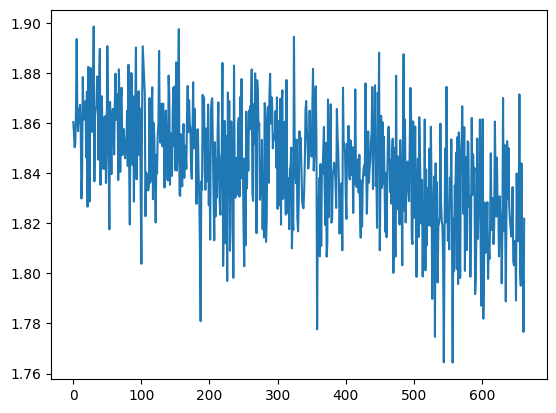

In [38]:
plt.plot(torch.arange(len(log_lossi)), log_lossi)

In [39]:
#@title valid - lr decay

for _ in range(50):

  minibatch_portion = 32

  # minibatch construct
  ix = torch.randint(0, Xdev.shape[0], (minibatch_portion,))

  # forward pass
  emb = C[Xdev[ix]]
  h = torch.tanh(emb.view(-1, block_size * embedded_dims) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ydev[ix])

  # backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in params:
    p.data += -lr * p.grad

  # track stats
  lossi.append(loss.item())
  log_lossi.append(loss.log10().item())

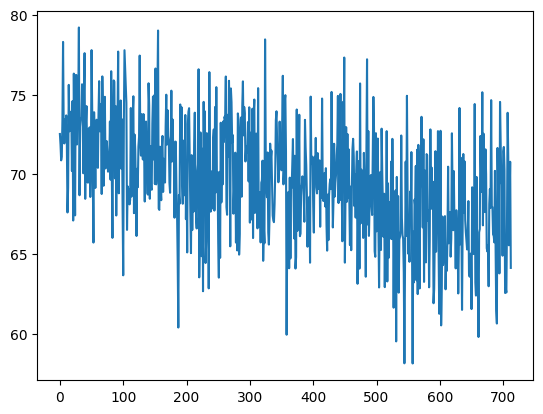

In [40]:
plt.plot(torch.arange(len(lossi)), lossi)

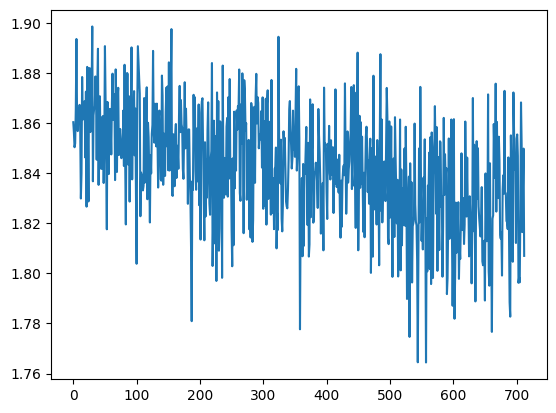

In [41]:
plt.plot(torch.arange(len(log_lossi)), log_lossi)

Se la loss sul valid/dev set è simile al train set allora il modello underfitta. La train deve essere un po' meno. Se è troppo meno allora il modello overfitta. Se underfitta aumentare la dimensione della rete. Se overfitta diminuirla. Se aumento la dimensione della rete ho bisogno di più step per allenarla. Valutare anche la grandezza degli embedding (mettere gli embedding più grandi forse (?)).
Minibatches create a little bit of noise on the loss. Se è troppa aumentare la dimensione delle minibatches.

In [42]:
# plottare gli embedding e cercare di capire se dopo averli allenati hanno un senso
pass

# Sampling from the model

In [43]:
# sample from the model (generate a all new playlist)

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(2):

  out = []
  context = [0] * block_size # initialize with all ...
  while True:
    emb = C[torch.tensor([context])] # (1,block_size,d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print('; '.join(itos[i] for i in out))

Unbroken Promise; Rock And Roll; VW Van; East Side High 2012 & Forever; Click Click Click; Between Angels And Insects; Hallelujah; Wolves of Winter; The New World; The Fox (What Does The Fox Say?); Idle Hands; Shockwave; Dos Coronas a Mi Madre; Oh Sing; Private Number; Mother and Child Reunion; Ain't She Sweet; What U Workin' With?; We Share The Same Skies; Ultra - Original Mix; Mama Tigueraje Remix; Not Me (feat. Cousin Fik); Rock N Roll Dream; Shady Love; After Life (feat. Stacy Barthe); I See the Lord - Live; History Maker (Yuri!!! on ICE); Not A Love Song; The Gospel Truth III; Hate It Or Love It; No Time to Bleed; bright pink tims (feat. Cam'ron); Lightning (Live); Brave; Flood; Maybe (Next To Normal); Get Down Low (feat. Ohana Bam); Losin My Mind; Baby Please; Sculpture; Perfect Pint (feat. Kendrick Lamar, Gucci Mane & Rae Sremmurd); Rudolph, the Red-Nosed Reindeer; Find You on My Knees; Danny Boy; Slave to the Rhythm - Audien Remix Radio Edit; The Go Round; Coyote; Seven Seas; L

In [44]:
# continuining a known playlist

chosen_playlist = playlists[0]   # farlo su Xte direttamente con gli indici volendo e fare metriche di valutazione
chosen_playlist

['Fanática Sensual',
 'El Amante',
 'El Perdón',
 'Travesuras',
 'Darte un Beso',
 'Vivir Mi Vida',
 'Despacito - Remix',
 'No Me Doy Por Vencido',
 'Si Tú No Estás',
 'Falsos Amigos (feat. Kendo Kaponi)',
 'No Sales de Mi Mente',
 'Bailando - Spanish Version',
 'Bajito',
 'La Niña de tus Ojos',
 'Noche De Sexo',
 'Niña Bonita',
 'Mi cama huele a ti',
 'Corazon Sin Cara',
 'Bonita',
 'Si Tu Novio Te Deja Sola',
 "Vente Pa' Ca",
 'Limbo',
 'Voy A Beber - Original',
 'Mi Gente',
 'Zumba',
 'Una Vaina Loca',
 'Safari',
 'Ella Me Levanto',
 'Candy',
 'Abusadora',
 'Pierdo la Cabeza - Official Remix',
 'Bailando por Ahi',
 'Pasarela',
 'Salio El Sol',
 'Noche De Sexo',
 'Hasta el Amanecer',
 'Lovumba',
 'Stand by Me',
 'Vivir Mi Vida',
 'Hasta el Amanecer',
 'La Gozadera',
 'Taboo',
 'DUELE EL CORAZON',
 'Yo Te Esperaré',
 'Te Suelto el Pelo',
 'Know No Better (feat. Travis Scott & Quavo) - Bad Bunny Remix',
 '6 AM',
 'Lo Que Paso, Paso',
 'Gasolina',
 'Esta Noche De Travesura']

In [47]:
context = [stoi[el] for el in chosen_playlist[:-1]]
itos[context[-1]]

'Gasolina'

In [50]:
context2 = [stoi[el] for el in chosen_playlist[:-1]][-1]
itos[context2]

'Gasolina'

In [58]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(1):

  out = []
  context = [stoi[el] for el in chosen_playlist[:-1]]
  context = context[len(context)-block_size:]

  emb = C[torch.tensor([context])] # (1,block_size,d)
  h = torch.tanh(emb.view(1, -1) @ W1 + b1)
  logits = h @ W2 + b2
  probs = F.softmax(logits, dim=1)
  ix = torch.multinomial(probs, num_samples=1, generator=g).item()
  context = context[1:] + [ix]
  out.append(ix)
  if ix == 0:
    break

  print('; '.join(itos[i] for i in out))


Namaste Meditation
